<a href="https://colab.research.google.com/github/waltermayor/dataAnalisis/blob/master/SeabornVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Cargar dataset


In [2]:
tips = sns.load_dataset("tips")
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


dividir los datos en numericos y categoricos 

In [25]:
numerical = ['total_bill', 'tip', 'size']
categorical = ['sex', 'smoker', 'day', 'time']
tips = tips[numerical + categorical]
tips.shape

(244, 7)

información estadistica

In [3]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## graficos univariantes 

Estos graficos permiten observar la frecuencia de una variable

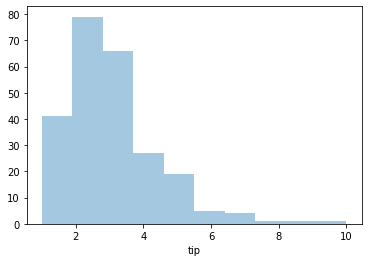

In [4]:
sns.distplot(tips['tip'], kde=False, bins=10);

con una mayor cantidad de bins se aprecia mejor la distribución

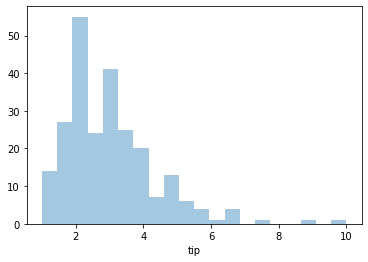

In [5]:
sns.distplot(tips['tip'], kde=False, bins=20);

crear histograma para todas las variables numericas. 

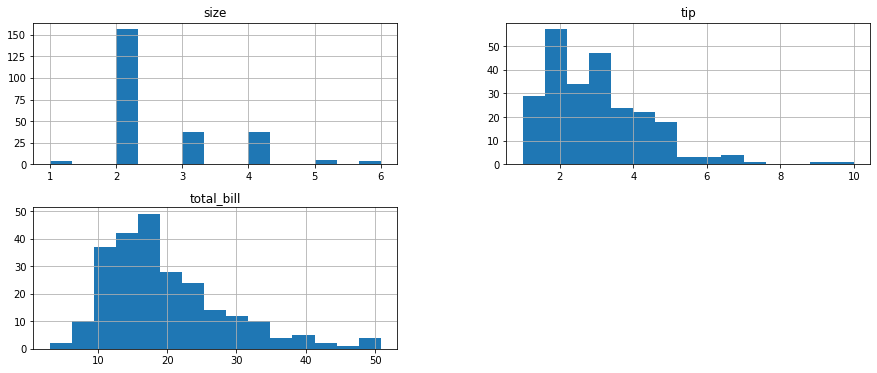

In [23]:
tips[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 2));

Kerner Density Estimate (KDE)

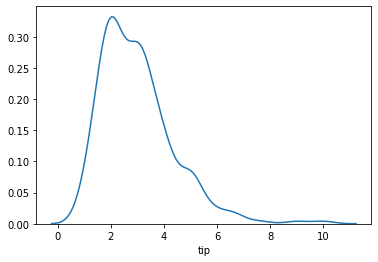

In [6]:
sns.distplot(tips['tip'],hist=False, bins=10);

## **Grafico bivariantes**

Estos grafios permiten observar la relación entre dos variables. Y como el cambio de valor de una varible afecta la otra. 

**Scatterplot**

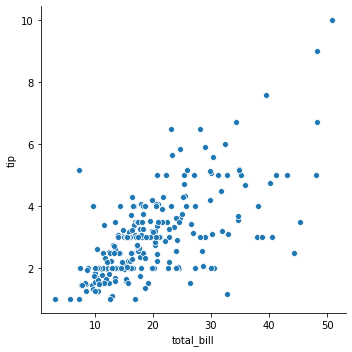

In [7]:
sns.relplot(x="total_bill", y="tip", data=tips);

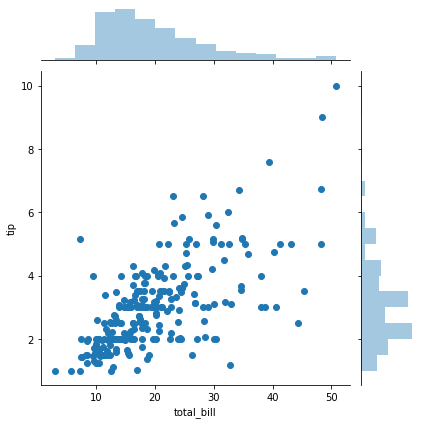

In [30]:
sns.jointplot(x="total_bill", y="tip", data=tips);
#sns.jointplot(x=tips['total_bill'], y=tips['tip']);

3 variables 

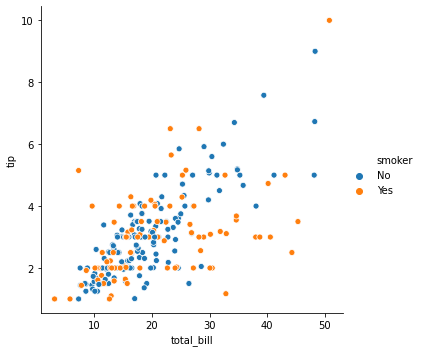

In [10]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

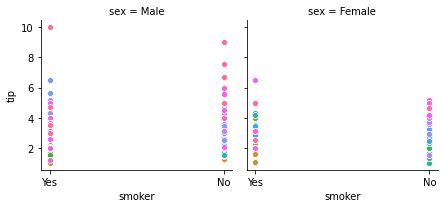

In [32]:
cond_plot = sns.FacetGrid(data=tips, col='sex', hue='total_bill', col_wrap=4)
cond_plot.map(sns.scatterplot, 'smoker', 'tip');

**Lineplot**

Los datos de la siuiente graica se encuentran muy aleatorios, lo cual puede indicar que "tip" no depende mucho de "total bill"

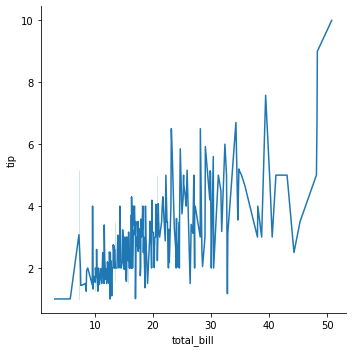

In [11]:
sns.relplot(x="total_bill", y="tip", kind="line", data=tips)

en el siguiente graficos los datos estan desordenados, por lo cual no es posible inferrir nada. Se recomienda ordenar antes de analizar con este tipo de graficos.

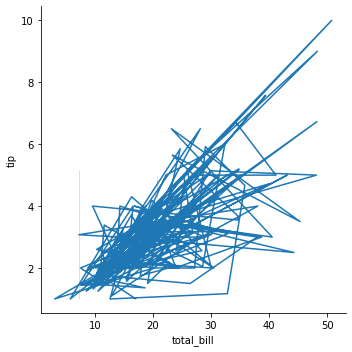

In [12]:
sns.relplot(x="total_bill", y="tip", sort=False, kind="line", data=tips)

## **Tipos de datos categoricos** 


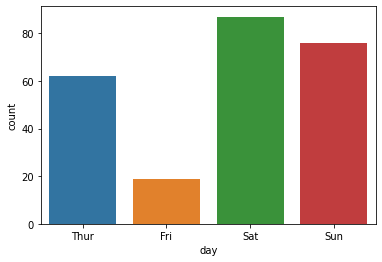

In [26]:
sns.countplot(tips["day"]);
#categorical = ['sex', 'smoker', 'day', 'time']

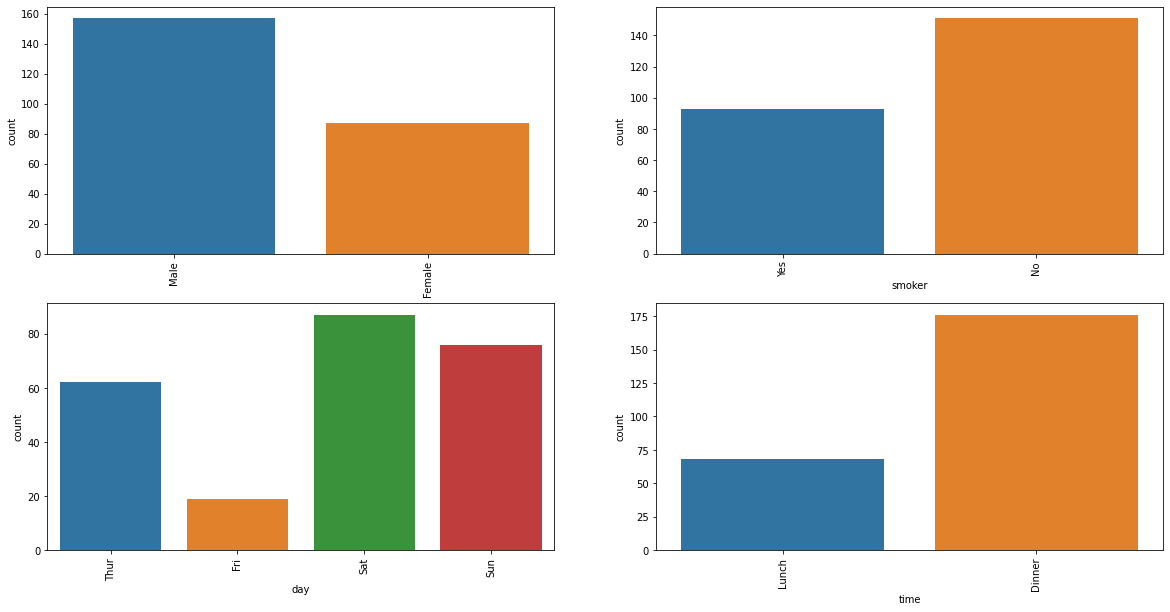

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(tips[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Scatterplot


los tips estan concentrados entre 2-4 sin importar el genero

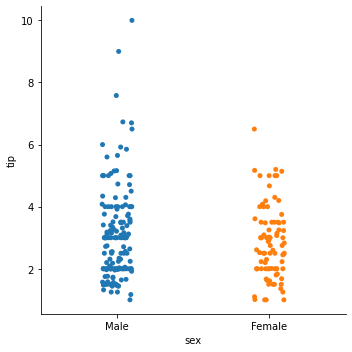

In [13]:
sns.catplot(x="sex", y="tip", data=tips);

diferentes tipos de scatterplots pueden ser realizados usando el atributo "kind"

Una tercer variable puede ser usada usando el atributo "hue"


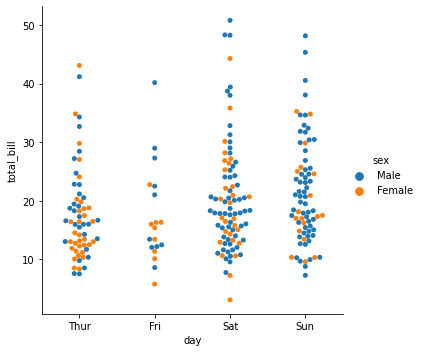

In [14]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

Como definir el orden de las categorias del eje x usando el atributo "order"

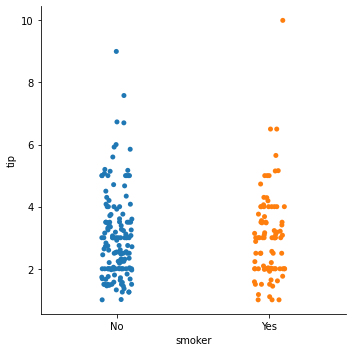

In [15]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

**Boxplot**

Usando estos graficos nostros podemos compara los valores para diferentes categorias. De este se puede inererir que el "total_bill" es mas alto el fin de semana que entre semana.

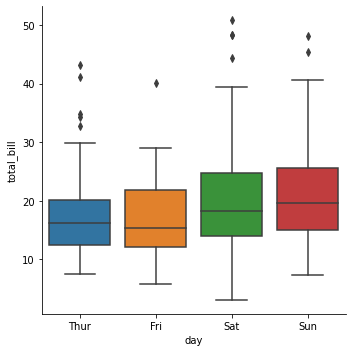

In [16]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

3 variables

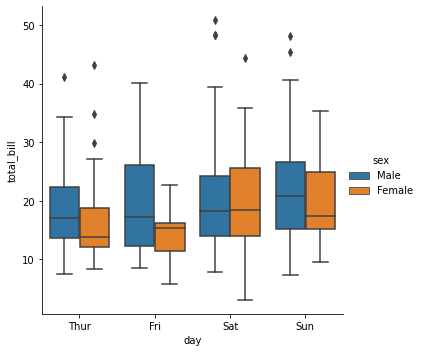

In [17]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="box", data=tips);

**Violin Plot**

Este grafico es usado para visualizar la distribución de los datos y su densidad de probabilidad. Este grafico es una combinacióón del Box plot y el density plot.

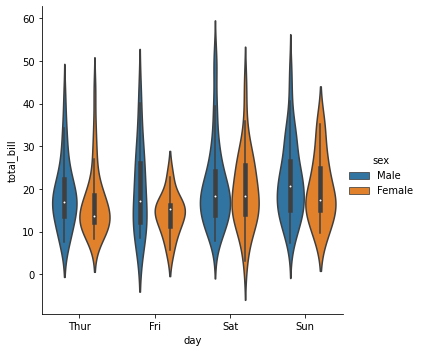

In [18]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", data=tips);

**Point plots**

no son muy informativos solo nos entregan la media y el ratio de error alrededor de la media. Se puede usar para encontrar cambios en una variable basada en dierentes categorias.

In [0]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="point", data=tips);